In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/movie.csv')
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
title,0
overview,1
release_date,0
popularity,0
vote_average,0
vote_count,0


In [5]:
round((df.isnull().sum() / df.shape[0] * 100),3)

,0
Unnamed: 0,0.000
id,0.000
title,0.000
overview,0.012
release_date,0.000
popularity,0.000
vote_average,0.000
vote_count,0.000


In [9]:
df.dropna(subset=['overview'], inplace=True)

In [10]:
round((df.isnull().sum() / df.shape[0] * 100),3)

,0
Unnamed: 0,0.0
id,0.0
title,0.0
overview,0.0
release_date,0.0
popularity,0.0
vote_average,0.0
vote_count,0.0


In [11]:
df.nunique()

,0
Unnamed: 0,8579
id,8361
title,8100
overview,8354
release_date,5527
popularity,7513
vote_average,2265
vote_count,3366


In [13]:
df = df.drop(columns = ['Unnamed: 0','id'])

df.head()

,title,overview,release_date,popularity,vote_average,vote_count
0,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477


<Axes: >

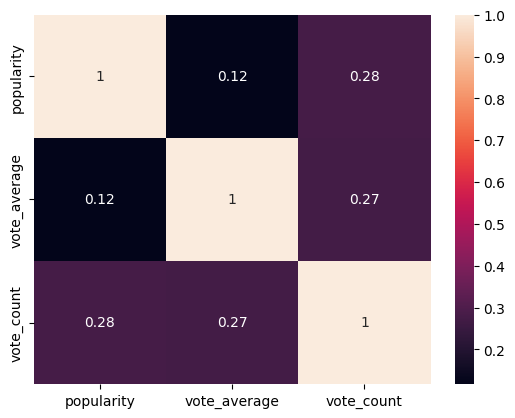

In [15]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

sns.heatmap(df[num_col].corr(),annot = True)

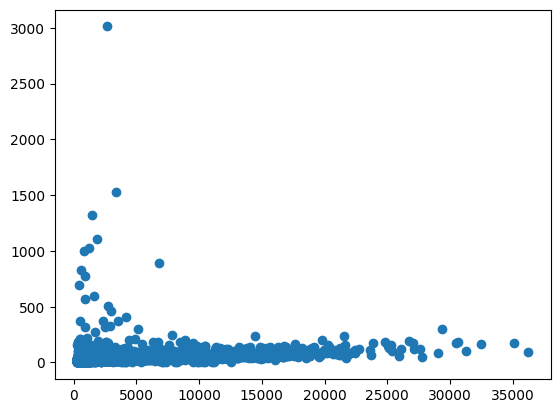

In [19]:
plt.scatter(df['vote_count'],df['popularity'])

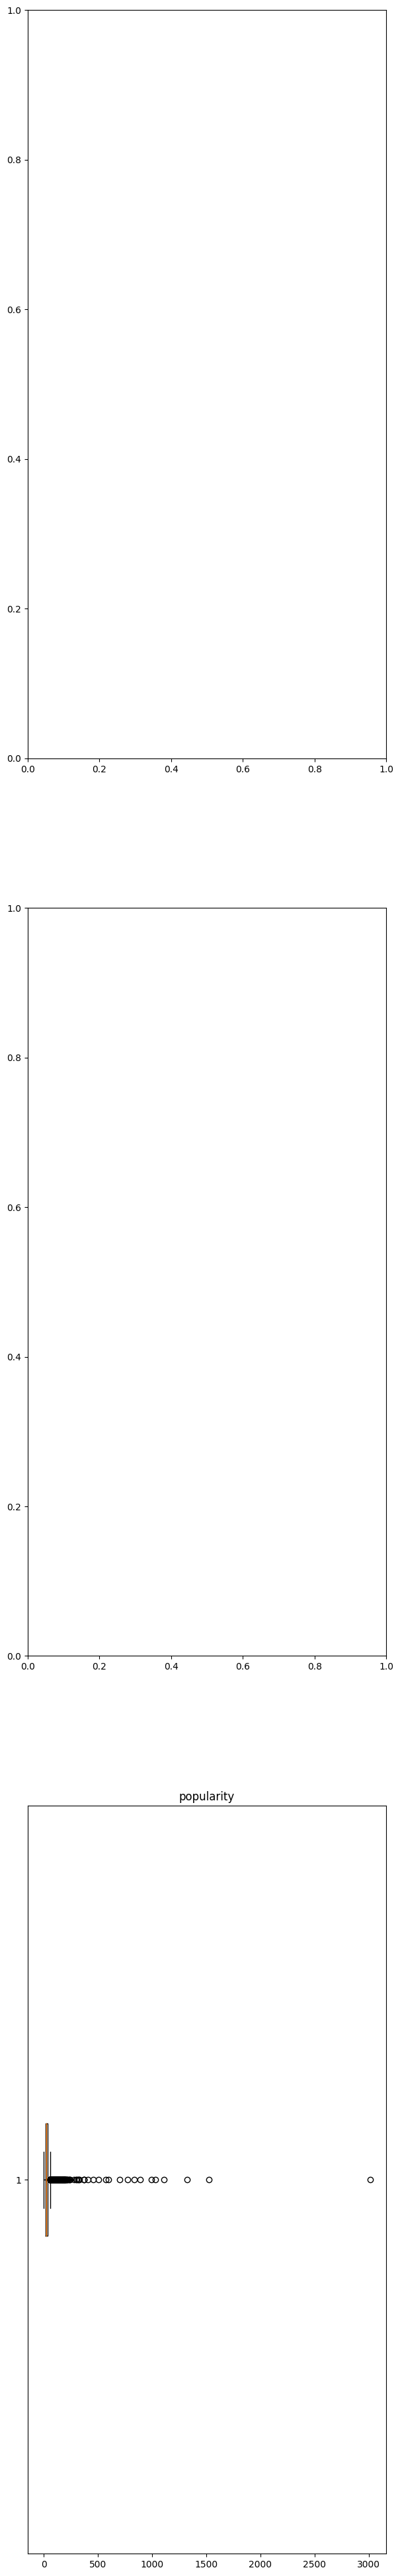

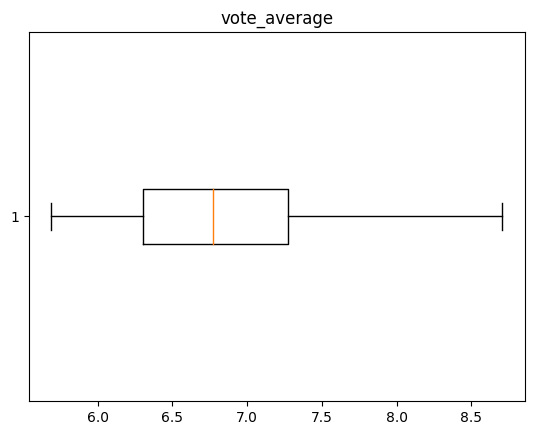

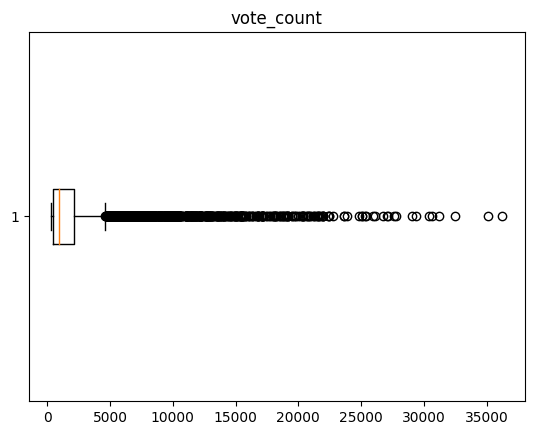

In [22]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [23]:
mean = np.mean(df['popularity'])
std = np.std(df['popularity'])

lower = mean - 2 * std
upper = mean + 2 * std




mean1 = np.mean(df['vote_count'])
std1 = np.std(df['vote_count'])

lower1 = mean1 - 2 * std1
upper1 = mean1 + 2 * std1

df2 = df[(df['popularity'] >= lower) & (df['popularity'] <= upper) & (df['vote_count'] >= lower1) & (df['vote_count'] <= upper1)]

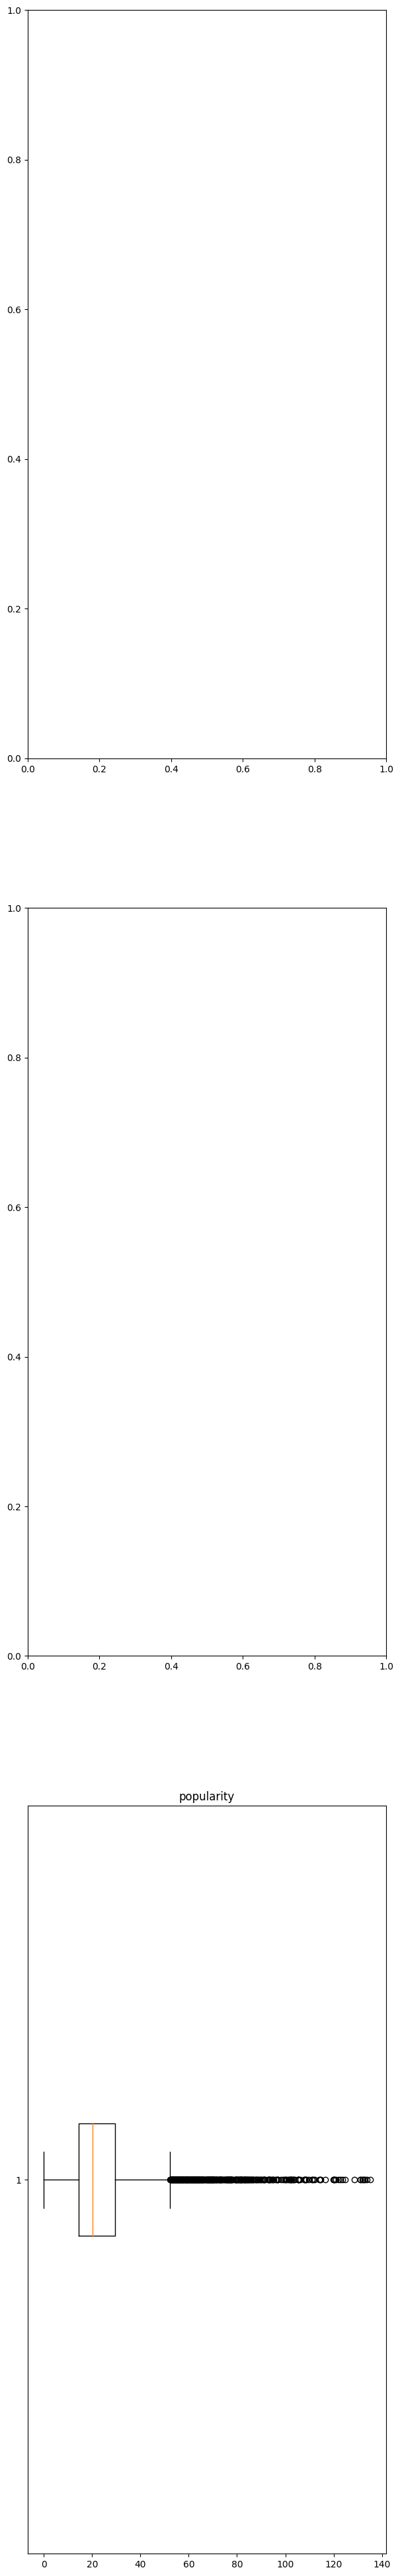

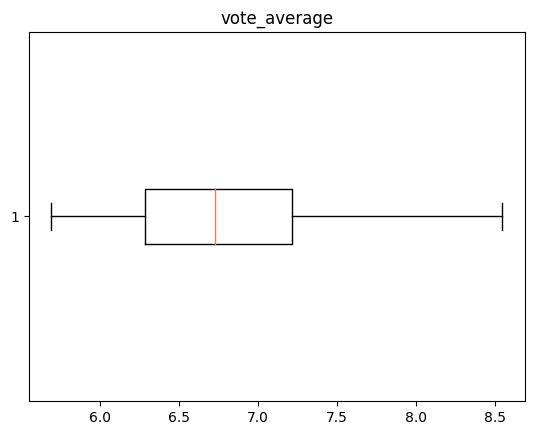

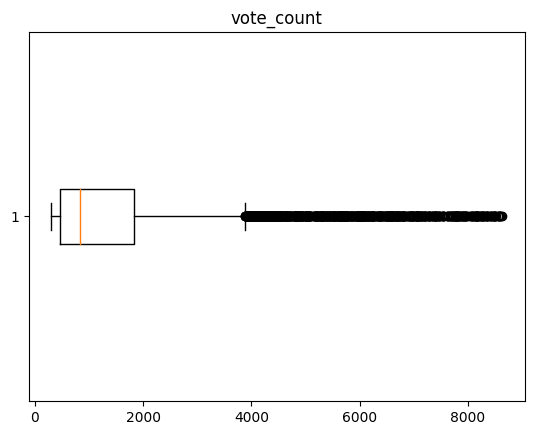

In [24]:
num_col = [col for col in df2.columns if df2[col].dtype != 'object']

fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df2[i],vert = False)
  plt.show()

In [25]:
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
  df2[col] = encoder.fit_transform(df2[col])

df2.head()

<ipython-input-25-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-25-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-25-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,title,overview,release_date,popularity,vote_average,vote_count
0,4923,595,5071,34.679,5.697,318
1,3477,1922,1532,16.374,5.697,320
2,366,605,3056,20.437,5.696,973
3,9,1680,2914,18.927,5.696,304
4,5504,5134,2018,12.022,5.696,477


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df2)

scaled_pd = pd.DataFrame(scaled,columns = df2.columns)

scaled_pd.head()

,title,overview,release_date,popularity,vote_average,vote_count
0,0.641935,0.075307,0.954991,0.256646,0.003151,0.002160
1,0.453384,0.243260,0.288512,0.121088,0.003151,0.002400
2,0.047725,0.076573,0.575518,0.151177,0.002801,0.080773
3,0.001174,0.212631,0.548776,0.139994,0.002801,0.000480
4,0.717695,0.649791,0.380038,0.088859,0.002801,0.021243


In [27]:
X = scaled_pd.drop(columns = ['vote_average'])
y = scaled_pd.vote_average

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print(X_train.shape)
print(X_test.shape)

(6495, 5)
(1624, 5)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

l1 = LinearRegression()

l1.fit(X_train,y_train)

y_pred = l1.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.17643009296190126


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)

X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)

l2 = LinearRegression()

l2.fit(X_train1,y_train)

y_pred = l2.predict(X_test1)

print(mean_absolute_error(y_test,y_pred))

0.1615580260788351


In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C' : [0.1,1,10,100],
    'gamma' : [1,0.1,0.01,0.001],
    'kernel' : ['linear','rbf','poly','sigmoid']
}

random = RandomizedSearchCV(SVR(),params,cv = 5,scoring = 'accuracy',verbose = 3,n_jobs = -1)

random.fit(X_train,y_train)

print(random.best_estimator_)
print(random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


SVR(C=10, gamma=0.001, kernel='linear')
{'kernel': 'linear', 'gamma': 0.001, 'C': 10}


In [41]:
svr = SVR(C=10, gamma=0.001, kernel='linear')

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

ada_boost = AdaBoostRegressor(
    estimator = svr,
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

ada_boost.fit(X_train,y_train)

scores = cross_val_score(ada_boost,X,y,cv = 5)

print(scores)
print(scores.mean())

[ -9.82657238 -14.50786493  -1.68223302 -21.61218978 -48.43907248]
-19.21358651829551


In [42]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grids = {
    'max_depth' : list(range(2,7)),
    'max_leaf_nodes' : list(range(2,100)),
    'min_samples_split' : [2,3,4]
}

random_search = RandomizedSearchCV(dtr,param_grids,cv = 5,scoring = 'accuracy',verbose = 3,n_jobs = -1)


random_search.fit(X_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=5, max_leaf_nodes=88, min_samples_split=3)
{'min_samples_split': 3, 'max_leaf_nodes': 88, 'max_depth': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [44]:
dtr = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=88, min_samples_split=3)

ada = AdaBoostRegressor(
    estimator = dtr,
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

ada.fit(X_train,y_train)

cross_scores = cross_val_score(ada,X,y,cv = 5)

print(cross_scores)
print(cross_scores.mean())

[ -8.69013796  -5.36014941  -2.31814146 -19.11484981 -55.94253142]
-18.285162012386298


In [45]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential

In [48]:
model = Sequential([
    layers.Dense(512,activation = 'relu'),
    layers.Dense(512,activation = 'relu'),
    layers.Dense(1)
])

model.compile(loss = 'mse',optimizer = 'adam',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Epoch 1/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 5.3910e-04 - loss: 0.0576 - val_accuracy: 0.0000e+00 - val_loss: 0.0397
Epoch 2/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 7.0496e-04 - loss: 0.0396 - val_accuracy: 0.0000e+00 - val_loss: 0.0394
Epoch 3/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 5.9998e-04 - loss: 0.0391 - val_accuracy: 0.0000e+00 - val_loss: 0.0396
Epoch 4/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 2.6966e-04 - loss: 0.0401 - val_accuracy: 0.0000e+00 - val_loss: 0.0386
Epoch 5/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 3.2961e-04 - loss: 0.0382 - val_accuracy: 0.0000e+00 - val_loss: 0.0396
